In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
plt.style.use('bmh')

In [2]:
#importing data
kick_data=pd.read_csv('data.csv')
print(kick_data.head())

           ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15

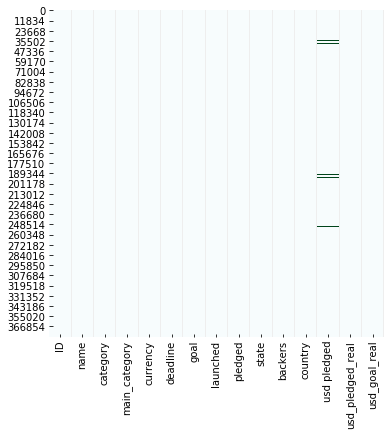

In [3]:
plt.figure(figsize=(6,6))
sns.heatmap(kick_data.isnull(),cbar=False,cmap='BuGn')

In [4]:
print(kick_data.describe())

                 ID          goal       pledged        backers   usd pledged  \
count  3.786610e+05  3.786610e+05  3.786610e+05  378661.000000  3.748640e+05   
mean   1.074731e+09  4.908079e+04  9.682979e+03     105.617476  7.036729e+03   
std    6.190862e+08  1.183391e+06  9.563601e+04     907.185035  7.863975e+04   
min    5.971000e+03  1.000000e-02  0.000000e+00       0.000000  0.000000e+00   
25%    5.382635e+08  2.000000e+03  3.000000e+01       2.000000  1.698000e+01   
50%    1.075276e+09  5.200000e+03  6.200000e+02      12.000000  3.947200e+02   
75%    1.610149e+09  1.600000e+04  4.076000e+03      56.000000  3.034090e+03   
max    2.147476e+09  1.000000e+08  2.033899e+07  219382.000000  2.033899e+07   

       usd_pledged_real  usd_goal_real  
count      3.786610e+05   3.786610e+05  
mean       9.058924e+03   4.545440e+04  
std        9.097334e+04   1.152950e+06  
min        0.000000e+00   1.000000e-02  
25%        3.100000e+01   2.000000e+03  
50%        6.243300e+02   5.50000

In [5]:
#drop misssin data
kick_data.dropna(inplace=True) 

In [6]:
print(kick_data['state'].value_counts())

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64


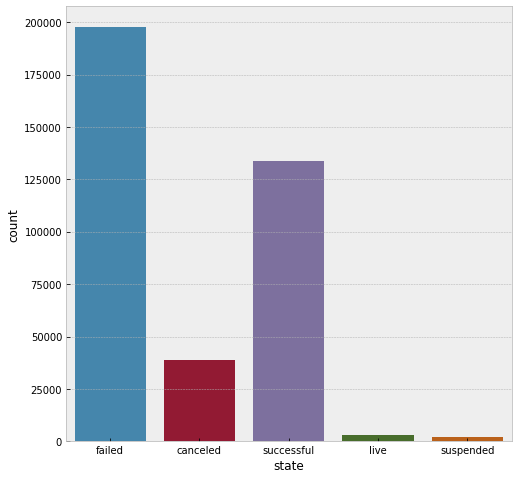

In [7]:
plt.figure(figsize=(8,8))
sns.countplot(x="state",data=kick_data)
#imbalanced data

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

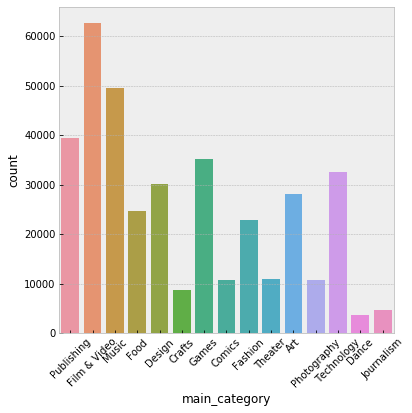

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x="main_category",data=kick_data)
plt.xticks(rotation=45)

In [9]:
print(kick_data['category'].unique())

['Poetry' 'Narrative Film' 'Music' 'Film & Video' 'Restaurants' 'Food'
 'Drinks' 'Product Design' 'Documentary' 'Nonfiction' 'Indie Rock'
 'Crafts' 'Games' 'Tabletop Games' 'Design' 'Comic Books' 'Art Books'
 'Fashion' 'Childrenswear' 'Theater' 'Comics' 'DIY' 'Webseries'
 'Animation' 'Food Trucks' 'Public Art' 'Illustration' 'Photography' 'Pop'
 'People' 'Art' 'Family' 'Fiction' 'Accessories' 'Rock' 'Hardware'
 'Software' 'Weaving' 'Gadgets' 'Web' 'Jazz' 'Ready-to-wear' 'Festivals'
 'Video Games' 'Anthologies' 'Publishing' 'Shorts' 'Electronic Music'
 'Radio & Podcasts' 'Apps' 'Cookbooks' 'Apparel' 'Metal' 'Comedy'
 'Hip-Hop' 'Periodicals' 'Dance' 'Technology' 'Painting' 'World Music'
 'Photobooks' 'Drama' 'Architecture' 'Young Adult' 'Latin' 'Mobile Games'
 'Flight' 'Fine Art' 'Action' 'Playing Cards' 'Makerspaces' 'Punk'
 'Thrillers' "Children's Books" 'Audio' 'Performance Art' 'Ceramics'
 'Vegan' 'Graphic Novels' 'Fabrication Tools' 'Performances' 'Sculpture'
 'Sound' 'Stationery' '

In [10]:
kick_data.corr()
#some of columns are highly correlated or repeated

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
ID,1.000000,0.001692,0.000478,0.000673,-0.000633,-0.000016,0.001868
goal,0.001692,1.000000,0.007327,0.003969,0.005534,0.005072,0.942691
pledged,0.000478,0.007327,1.000000,0.717858,0.857370,0.952736,0.004992
backers,0.000673,0.003969,0.717858,1.000000,0.697426,0.753449,0.004476
usd pledged,-0.000633,0.005534,0.857370,0.697426,1.000000,0.907743,0.006172
usd_pledged_real,-0.000016,0.005072,0.952736,0.753449,0.907743,1.000000,0.005566
usd_goal_real,0.001868,0.942691,0.004992,0.004476,0.006172,0.005566,1.000000


In [11]:
#create new feature for name column
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=50)
vectorizer.fit(kick_data['name'].values.astype('U'))
# summarize
print(vectorizer.vocabulary_)

{'the': 41, 'of': 32, 'from': 18, 'for': 17, 'is': 22, 'help': 20, 'to': 42, 'album': 0, 'film': 14, 'project': 36, 'art': 5, 'our': 35, 'make': 26, 'in': 21, 'with': 46, 'documentary': 12, 'canceled': 9, 'and': 3, 'new': 30, 'cd': 10, 'game': 19, 'on': 33, 'life': 24, 'first': 15, 'book': 7, 'story': 40, 'my': 29, 'short': 38, 'one': 34, 'debut': 11, 'music': 28, 'video': 45, 'me': 27, 'you': 48, 'novel': 31, 'at': 6, 'love': 25, 'by': 8, 'your': 49, 'it': 23, 'all': 1, 'show': 39, 'ep': 13, 'tour': 43, 'food': 16, 'up': 44, 'series': 37, 'world': 47, 'an': 2, 'app': 4}


In [12]:
vector = vectorizer.transform(kick_data['name'].values.astype('U'))

print(vector.shape)
print(type(vector))
print(vector.toarray())

(374860, 50)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [13]:
vector.__class__
vector=vector.todense()
df_vector=pd.DataFrame(vector, index=kick_data.index, columns=vectorizer.get_feature_names())

In [14]:
df_vector.head()

,album,all,an,and,app,art,at,book,by,canceled,...,story,the,to,tour,up,video,with,world,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
#drop unnecessary columns
kick_data.drop(['ID','name','deadline','goal','launched','pledged','usd pledged'],axis=1,inplace=True)

,category,main_category,currency,state,backers,country,usd_pledged_real,usd_goal_real
0,Poetry,Publishing,GBP,failed,0,GB,0.0,1533.95
1,Narrative Film,Film & Video,USD,failed,15,US,2421.0,30000.00
2,Narrative Film,Film & Video,USD,failed,3,US,220.0,45000.00
3,Music,Music,USD,failed,1,US,1.0,5000.00
4,Film & Video,Film & Video,USD,canceled,14,US,1283.0,19500.00


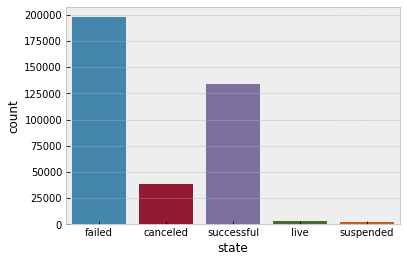

In [16]:
sns.countplot(x="state",data=kick_data)
kick_data.head()

In [17]:
#standardize numerical features
from sklearn.preprocessing import StandardScaler
numerical_features = ['backers','usd_pledged_real','usd_goal_real']
scaler = StandardScaler()
scaled_features = scaler.fit(kick_data[numerical_features]).transform(kick_data[numerical_features])
scaled_features = pd.DataFrame(scaled_features,index=kick_data.index, columns=numerical_features)

In [18]:
#create feature dataframe with all good features included
selected_columns = pd.concat([kick_data.drop(numerical_features,axis=1), scaled_features, df_vector], axis=1)
selected_columns.head()

,category,main_category,currency,state,country,backers,usd_pledged_real,usd_goal_real,album,all,...,story,the,to,tour,up,video,with,world,you,your
0,Poetry,Publishing,GBP,failed,GB,-0.117020,-0.099879,-0.038255,0,0,...,0,1,0,0,0,0,0,0,0,0
1,Narrative Film,Film & Video,USD,failed,US,-0.100568,-0.073368,-0.013690,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Narrative Film,Film & Video,USD,failed,US,-0.113730,-0.097470,-0.000745,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Music,Music,USD,failed,US,-0.115923,-0.099868,-0.035264,1,0,...,0,0,1,0,0,0,0,0,0,0
4,Film & Video,Film & Video,USD,canceled,US,-0.101664,-0.085829,-0.022751,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
#convert categorial to one-hot
main_category=pd.get_dummies(selected_columns['main_category'],drop_first=False)
currency=pd.get_dummies(selected_columns['currency'],drop_first=False)
country=pd.get_dummies(selected_columns['country'],drop_first=False)
category=pd.get_dummies(selected_columns['category'],drop_first=False)


selected_columns.drop(['main_category','currency','country','category'],axis=1,inplace=True)
selected_columns=pd.concat([selected_columns,main_category,currency,country,category],axis=1)
print(selected_columns.head())

      state   backers  usd_pledged_real  usd_goal_real  album  all  an  and  \
0    failed -0.117020         -0.099879      -0.038255      0    0   0    0   
1    failed -0.100568         -0.073368      -0.013690      0    0   0    0   
2    failed -0.113730         -0.097470      -0.000745      0    0   0    0   
3    failed -0.115923         -0.099868      -0.035264      1    0   0    0   
4  canceled -0.101664         -0.085829      -0.022751      0    0   0    0   

   app  art  ...    Wearables  Weaving  Web  Webcomics  Webseries  \
0    0    0  ...            0        0    0          0          0   
1    0    0  ...            0        0    0          0          0   
2    0    0  ...            0        0    0          0          0   
3    0    0  ...            0        0    0          0          0   
4    0    1  ...            0        0    0          0          0   

   Woodworking  Workshops  World Music  Young Adult  Zines  
0            0          0            0           

In [20]:
#convert target labels from string to number
#and define feautures and target
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(selected_columns['state'])  #target

x = selected_columns.drop(['state'],axis=1)   #features
print(x.shape,y.shape)

(374860, 263) (374860,)


In [21]:
#split the data for training and testing the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=265)

In [22]:
#using Random forest classifier to model imbalanced data
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50 ,max_depth=100, min_samples_leaf=3, random_state=36)

clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=36, verbose=0, warm_start=False)

In [23]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [24]:
feature_importances

,importance
usd_pledged_real,2.996073e-01
backers,2.918304e-01
canceled,1.791829e-01
usd_goal_real,1.450110e-01
Music,3.838121e-03
Technology,3.829374e-03
Tabletop Games,2.687266e-03
Theater,2.675854e-03
Product Design,2.019681e-03
Games,1.952989e-03


In [25]:
#predict the test data using model
y_predictions = clf.predict(x_test)

/var/web_services/galaxy/jupyter_conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.60      0.75     11550
          1       0.91      0.97      0.94     59196
          2       0.00      0.00      0.00       864
          3       0.95      0.99      0.97     40304
          4       0.00      0.00      0.00       544

avg / total       0.92      0.93      0.92    112458

Accuracy:  0.9276352060324743
[[ 6883  4364     0   303     0]
 [    2 57654     0  1540     0]
 [    0   687     0   177     0]
 [    0   521     0 39783     0]
 [    2   457     0    85     0]]


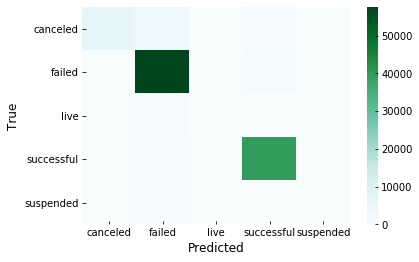

In [26]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predictions))
print('Accuracy: ', accuracy_score(y_test,y_predictions))

from sklearn.metrics import confusion_matrix
class_labels = list(le.classes_)
sns.heatmap(confusion_matrix(y_test,y_predictions),xticklabels=class_labels
            ,yticklabels=class_labels,cmap='BuGn')
plt.xlabel("Predicted")
plt.ylabel("True")
print(confusion_matrix(y_test,y_predictions))

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()

clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

/var/web_services/galaxy/jupyter_conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       1.00      0.60      0.75     11550
          1       0.91      0.97      0.94     59196
          2       0.00      0.00      0.00       864
          3       0.95      0.99      0.97     40304
          4       0.00      0.00      0.00       544

avg / total       0.92      0.93      0.92    112458

Accuracy:  0.9276352060324743
[[ 6883  4364     0   303     0]
 [    2 57654     0  1540     0]
 [    0   687     0   177     0]
 [    0   521     0 39783     0]
 [    2   457     0    85     0]]


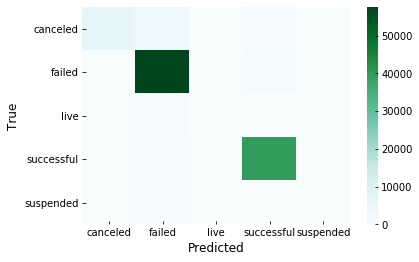

In [28]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_predictions))
print('Accuracy: ', accuracy_score(y_test,y_predictions))

from sklearn.metrics import confusion_matrix
class_labels = list(le.classes_)
sns.heatmap(confusion_matrix(y_test,y_predictions),xticklabels=class_labels
            ,yticklabels=class_labels,cmap='BuGn')
plt.xlabel("Predicted")
plt.ylabel("True")
print(confusion_matrix(y_test,y_predictions))